In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score, recall_score,accuracy_score

In [68]:
# === 1. Load dữ liệu ===
df = pd.read_csv("Supply Chain & Sales Datasets.csv") 
df

,Retail Order ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,Country,...,Category,Returned,Sales,Quantity,Discount,Profit,Cost,Unit CP,Unit SP,Days
0,1,CA-2016-152156,8/11/2016 0:00,11/11/2016 0:00,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,...,Furniture,Not,261.9600,2,0.00,41.9136,220.0464,110.0232,130.9800,92
1,2,CA-2016-152156,8/11/2016 0:00,11/11/2016 0:00,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,...,Furniture,Not,731.9400,3,0.00,219.5820,512.3580,170.7860,243.9800,92
2,3,CA-2016-138688,12/6/2016 0:00,12/6/2016 0:00,Second Class,DV-13045,Darrin Van Huff,Corporate,90036,United States,...,Office Supplies,Not,14.6200,2,0.00,6.8714,7.7486,3.8743,7.3100,0
3,4,US-2015-108966,11/10/2015 0:00,11/10/2015 0:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,...,Furniture,Not,957.5775,5,0.45,-383.0310,1340.6085,268.1217,191.5155,0
4,5,US-2015-108966,11/10/2015 0:00,11/10/2015 0:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,...,Office Supplies,Not,22.3680,2,0.20,2.5164,19.8516,9.9258,11.1840,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014 0:00,1/23/2014 0:00,Second Class,TB-21400,Tom Boeckenhauer,Consumer,33180,United States,...,Furniture,Not,25.2480,3,0.20,4.1028,21.1452,7.0484,8.4160,2
9990,9991,CA-2017-121258,2/26/2017 0:00,3/3/2017 0:00,Standard Class,DB-13060,Dave Brooks,Consumer,92627,United States,...,Furniture,Yes,91.9600,2,0.00,15.6332,76.3268,38.1634,45.9800,5
9991,9992,CA-2017-121258,2/26/2017 0:00,3/3/2017 0:00,Standard Class,DB-13060,Dave Brooks,Consumer,92627,United States,...,Technology,Yes,258.5760,2,0.20,19.3932,239.1828,119.5914,129.2880,5
9992,9993,CA-2017-121258,2/26/2017 0:00,3/3/2017 0:00,Standard Class,DB-13060,Dave Brooks,Consumer,92627,United States,...,Office Supplies,Yes,29.6000,4,0.00,13.3200,16.2800,4.0700,7.4000,5


In [69]:
df[df['Returned'] == "Yes"]

,Retail Order ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,Country,...,Category,Returned,Sales,Quantity,Discount,Profit,Cost,Unit CP,Unit SP,Days
18,19,CA-2014-143336,8/27/2014 0:00,8/27/2014 0:00,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,94109,United States,...,Office Supplies,Yes,8.560,2,0.0,2.4824,6.0776,3.0388,4.280,0
19,20,CA-2014-143336,8/27/2014 0:00,8/27/2014 0:00,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,94109,United States,...,Technology,Yes,213.480,3,0.2,16.0110,197.4690,65.8230,71.160,0
20,21,CA-2014-143336,8/27/2014 0:00,8/27/2014 0:00,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,94109,United States,...,Office Supplies,Yes,22.720,4,0.2,7.3840,15.3360,3.8340,5.680,0
55,56,CA-2016-111682,6/17/2016 0:00,6/18/2016 0:00,First Class,TB-21055,Ted Butterfield,Consumer,12180,United States,...,Office Supplies,Yes,208.560,6,0.0,52.1400,156.4200,26.0700,34.760,1
56,57,CA-2016-111682,6/17/2016 0:00,6/18/2016 0:00,First Class,TB-21055,Ted Butterfield,Consumer,12180,United States,...,Office Supplies,Yes,32.400,5,0.0,15.5520,16.8480,3.3696,6.480,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,9958,US-2014-143287,11/11/2014 0:00,11/17/2014 0:00,Standard Class,KN-16705,Kristina Nunn,Home Office,10801,United States,...,Office Supplies,Yes,223.920,4,0.0,109.7208,114.1992,28.5498,55.980,6
9958,9959,US-2014-143287,11/11/2014 0:00,11/17/2014 0:00,Standard Class,KN-16705,Kristina Nunn,Home Office,10801,United States,...,Office Supplies,Yes,7.300,2,0.0,2.1900,5.1100,2.5550,3.650,6
9990,9991,CA-2017-121258,2/26/2017 0:00,3/3/2017 0:00,Standard Class,DB-13060,Dave Brooks,Consumer,92627,United States,...,Furniture,Yes,91.960,2,0.0,15.6332,76.3268,38.1634,45.980,5
9991,9992,CA-2017-121258,2/26/2017 0:00,3/3/2017 0:00,Standard Class,DB-13060,Dave Brooks,Consumer,92627,United States,...,Technology,Yes,258.576,2,0.2,19.3932,239.1828,119.5914,129.288,5


In [70]:
df[df['Returned'] == "Not"]

,Retail Order ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,Country,...,Category,Returned,Sales,Quantity,Discount,Profit,Cost,Unit CP,Unit SP,Days
0,1,CA-2016-152156,8/11/2016 0:00,11/11/2016 0:00,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,...,Furniture,Not,261.9600,2,0.00,41.9136,220.0464,110.0232,130.9800,92
1,2,CA-2016-152156,8/11/2016 0:00,11/11/2016 0:00,Second Class,CG-12520,Claire Gute,Consumer,42420,United States,...,Furniture,Not,731.9400,3,0.00,219.5820,512.3580,170.7860,243.9800,92
2,3,CA-2016-138688,12/6/2016 0:00,12/6/2016 0:00,Second Class,DV-13045,Darrin Van Huff,Corporate,90036,United States,...,Office Supplies,Not,14.6200,2,0.00,6.8714,7.7486,3.8743,7.3100,0
3,4,US-2015-108966,11/10/2015 0:00,11/10/2015 0:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,...,Furniture,Not,957.5775,5,0.45,-383.0310,1340.6085,268.1217,191.5155,0
4,5,US-2015-108966,11/10/2015 0:00,11/10/2015 0:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,33311,United States,...,Office Supplies,Not,22.3680,2,0.20,2.5164,19.8516,9.9258,11.1840,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,9/29/2016 0:00,9/29/2016 0:00,Standard Class,ML-17410,Maris LaWare,Consumer,90008,United States,...,Technology,Not,36.2400,1,0.00,15.2208,21.0192,21.0192,36.2400,0
9987,9988,CA-2017-163629,11/17/2017 0:00,11/21/2017 0:00,Standard Class,RA-19885,Ruben Ausman,Corporate,30605,United States,...,Technology,Not,79.9900,1,0.00,28.7964,51.1936,51.1936,79.9900,4
9988,9989,CA-2017-163629,11/17/2017 0:00,11/21/2017 0:00,Standard Class,RA-19885,Ruben Ausman,Corporate,30605,United States,...,Technology,Not,206.1000,5,0.00,55.6470,150.4530,30.0906,41.2200,4
9989,9990,CA-2014-110422,1/21/2014 0:00,1/23/2014 0:00,Second Class,TB-21400,Tom Boeckenhauer,Consumer,33180,United States,...,Furniture,Not,25.2480,3,0.20,4.1028,21.1452,7.0484,8.4160,2


In [71]:
# === 2. Xử lý dữ liệu ===
label_cols = ['Ship Mode',
              'Customer Name', 'Segment', 
              'City', 'State', 'Region',
              'Retail Sales People',
              'Product Name', 'Sub-Category', 'Category']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [72]:
df['Returned'] = df['Returned'].map({'Yes': 1, 'Not': 0})

In [73]:
feature_cols = ['Ship Mode','Customer Name', 'Segment', 'City', 'State',
                'Region', 'Retail Sales People',
                'Product Name', 'Sub-Category', 'Category', 'Sales', 'Quantity',
                'Discount', 'Profit', 'Cost', 'Unit CP', 'Unit SP', 'Days']

X = df[feature_cols].values
y = df['Returned'].values

In [74]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# CNN yêu cầu 3D input: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [75]:
# === 3. Chia dữ liệu ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [76]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6995
6995
2999
2999


In [77]:
outcome0_train = (y_train == 0).sum()
outcome0_train

np.int64(6451)

In [78]:
outcome1_train = (y_train == 1).sum()
outcome1_train

np.int64(544)

In [79]:
outcome0_test = (y_test == 0).sum()
outcome0_test

np.int64(2743)

In [80]:
outcome1_test = (y_test == 1).sum()
outcome1_test

np.int64(256)

In [81]:
# === 4. Xây dựng CNN ===
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Phân loại nhị phân
])

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
# === 5. Huấn luyện ===
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 0.3276 - val_accuracy: 0.9186 - val_loss: 0.2688
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9170 - loss: 0.2738 - val_accuracy: 0.9186 - val_loss: 0.2704
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.2627 - val_accuracy: 0.9186 - val_loss: 0.2669
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9244 - loss: 0.2574 - val_accuracy: 0.9186 - val_loss: 0.2671
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.2572 - val_accuracy: 0.9186 - val_loss: 0.2683
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9226 - loss: 0.2599 - val_accuracy: 0.9186 - val_loss: 0.2649
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.2496 - val_accuracy: 0.9186 - val_loss: 0.2628
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9294 - loss: 0.2443 - val_accuracy: 0.

In [84]:
# === 6. Đánh giá ===
loss, acc = model.evaluate(X_test, y_test)
# Dự đoán xác suất trả về (giá trị từ 0 đến 1)
y_pred_prob = model.predict(X_test)

# Chuyển xác suất thành nhãn 0 hoặc 1 (ngưỡng 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int).reshape(-1)

# Tính accuracy thủ công
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9179 - loss: 0.2682
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9146


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# === 7. Dự đoán ===
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


In [86]:
# # === 8. Confusion Matrix ===
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(5,4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Returned', 'Returned'], yticklabels=['Not Returned', 'Returned'])
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.show()

In [87]:
# # === 9. Classification Report ===
# print(classification_report(y_test, y_pred, target_names=['Not Returned', 'Returned']))

Số lượng features: 18
Kích thước weights: (896, 64)
         Feature  Importance
4          State    0.057684
17          Days    0.055233
2        Segment    0.051646
9       Category    0.048413
15       Unit CP    0.047023
10         Sales    0.043252
16       Unit SP    0.042829
13        Profit    0.042746
8   Sub-Category    0.042219
14          Cost    0.041857


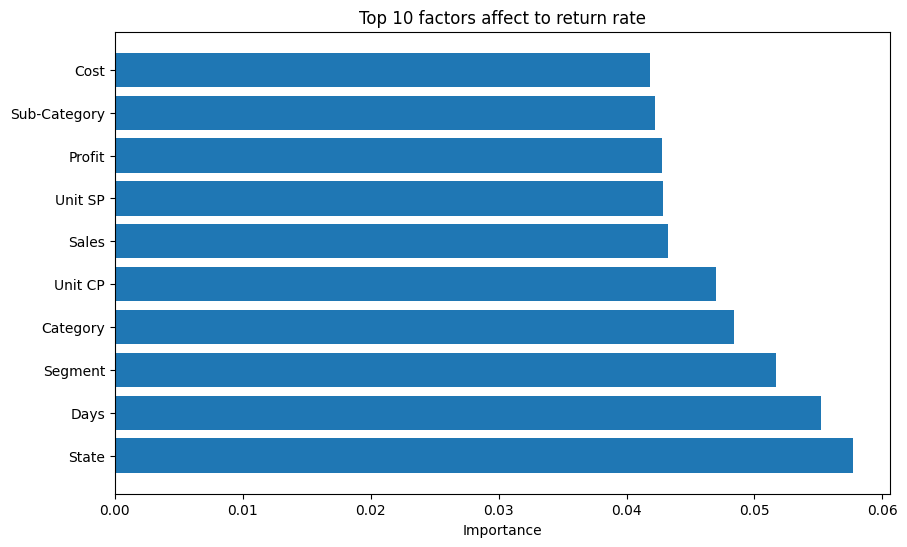

In [88]:
# === 10. Factors affect to return rate ===
import matplotlib.pyplot as plt
# Lấy trọng số từ layer Dense cuối cùng
last_dense_layer = model.layers[-2]  # Layer trước output
weights = last_dense_layer.get_weights()[0]

# Tính importance bằng cách lấy trung bình absolute values theo chiều features
importance = np.mean(np.abs(weights), axis=1)

# Đảm bảo số lượng features khớp với importance scores
print(f"Số lượng features: {len(feature_cols)}")
print(f"Kích thước weights: {weights.shape}")

# Tạo DataFrame feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importance[:len(feature_cols)]  # Chỉ lấy số lượng tương ứng
}).sort_values('Importance', ascending=False)

# Top 10 features quan trọng
top_features = feature_importance.head(10)
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 factors affect to return rate')
plt.show()
